### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

### Read Data

In [2]:
books = pd.read_csv('BX-Books.csv', sep=';',error_bad_lines=False,encoding="latin-1")
users = pd.read_csv('BX-Users.csv', sep=';',error_bad_lines=False,encoding="latin-1")
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';',error_bad_lines=False,encoding="latin-1")
books.columns = ['ISBN','bookTitle','bookAuthor','yearOfPublication','publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users.columns = ['userID','Location','Age']
ratings.columns = ['userID','ISBN','bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


### Explore the Data and Join required data sources after eliminating unnecessary data elements

In [3]:
books.head(5)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
users.head(5)

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
ratings.head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
print('shape of books file is:',books.shape)
print('shape of users file is:',users.shape)
print('shape of ratings file is:',ratings.shape)

print('Number of distinct ISBN in books file are:',books.ISBN.nunique())
print('Number of distinct ISBN in ratings file are:',ratings.ISBN.nunique())

print('Number of distinct userIDs in users file are:',users.userID.nunique())
print('Number of distinct userIDs in ratings file are:',ratings.userID.nunique())


shape of books file is: (271360, 8)
shape of users file is: (278858, 3)
shape of ratings file is: (1149780, 3)
Number of distinct ISBN in books file are: 271360
Number of distinct ISBN in ratings file are: 340556
Number of distinct userIDs in users file are: 278858
Number of distinct userIDs in ratings file are: 105283


## Merge all the 3 data sources - Ratings, Users & Books. Perform a left join on Ratings to make sure that we do not lose any rating information

In [7]:
full_data_interim = pd.merge(ratings,users,on='userID',how='left')
full_data = pd.merge(full_data_interim,books,on='ISBN',how='left')
full_data.head(5)

,userID,ISBN,bookRating,Location,Age,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,276725,034545104X,0,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,"seattle, washington, usa",NaN,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,"h, new south wales, australia",16.0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,"rijeka, n/a, croatia",16.0,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,"rijeka, n/a, croatia",16.0,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


## Check for duplicates & Null values. Drop duplicates & Null values if present

In [8]:
full_data.shape

(1149780, 12)

In [9]:
full_data.isnull().sum(axis=0)

userID                    0
ISBN                      0
bookRating                0
Location                  0
Age                  309492
bookTitle            118644
bookAuthor           118645
yearOfPublication    118644
publisher            118646
imageUrlS            118644
imageUrlM            118644
imageUrlL            118648
dtype: int64

In [10]:
nodup_full_data = full_data.drop_duplicates()
nodup_full_data.shape

(1149780, 12)

In [11]:
nodup_data = nodup_full_data[['ISBN','bookRating','bookTitle']]
nodup_data = nodup_data.dropna()
nodup_data.shape

(1031136, 3)

In [12]:
nodup_data.isnull().sum(axis=0)

ISBN          0
bookRating    0
bookTitle     0
dtype: int64

In [13]:
nodup_data.head(5)

,ISBN,bookRating,bookTitle
0,034545104X,0,Flesh Tones: A Novel
1,0155061224,5,Rites of Passage
2,0446520802,0,The Notebook
3,052165615X,3,Help!: Level 1
4,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...


## Check for Outliers

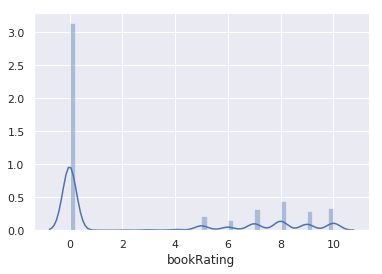

In [14]:
sns.distplot(nodup_data['bookRating'])
plt.show()

## Check for number of ratings for each book and standardize it

In [15]:
nodup_data.bookTitle.nunique()

241071

In [16]:
nodup_data.ISBN.nunique()

270151

In [17]:
book_ratingCount = (nodup_data.groupby(by = ['bookTitle'])['bookRating']
                    .count().reset_index().rename(columns = {'bookRating': 'totalRatingCount'})
                    [['bookTitle','totalRatingCount']])

In [18]:
book_ratingCount.head()

,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [19]:
book_ratingCount.shape

(241071, 2)

In [20]:
book_ratingCount.totalRatingCount.unique()

array([   4,    1,    2,   10,    9,   11,   17,    3,    5,   47,    8,
          6,   12,   22,    7,   61,   13,   23,   37,   28,   65,   14,
         20,  284,  509,   24,   25,   90,   21,   71,   57,  106,   30,
        356,   85,  151,   16,   50,   31,  125,   41,   74,   44,   46,
         32,   18,  136,   15,  346,   35,   29,   26,   38,  236,   27,
        265,  156,   33,   52,   83,   67,   81,  139,   92,   54,  108,
         39,  140,  116,   40,   42,   34,   48,  169,  104,   99,  302,
        285,   86,  192,  109,   59,   75,  128,  174,  327,   19,   49,
         36,   51,   66,  838,   68,  149,   64,   82,   63,   76,  413,
         60,   56,  118,   78,   45,   95,   62,   43,   97,  135,  210,
        549,   96,  101,  164,  205,  378,  273,   53,  158,  150,   70,
         69,  279,  262,  121,  126,   77,  141,  332,  112,   84,  187,
         58,  258,   55,  184,  147,  304,  110,   93,  114,   91,   72,
         94,   80,  326,  222,  170,  670,  167,  2

In [21]:
rating_with_totals = full_data.merge(book_ratingCount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
rating_with_totals = rating_with_totals[['userID','bookTitle','ISBN','bookRating','totalRatingCount']]
rating_with_totals.head()

,userID,bookTitle,ISBN,bookRating,totalRatingCount
0,276725,Flesh Tones: A Novel,034545104X,0,60.0
1,276726,Rites of Passage,0155061224,5,14.0
2,276727,The Notebook,0446520802,0,650.0
3,276729,Help!: Level 1,052165615X,3,1.0
4,276729,The Amsterdam Connection : Level 4 (Cambridge ...,0521795028,6,1.0


### Quick Stats for totalratingcount

In [22]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   241071.000
mean         4.277
std         16.739
min          1.000
25%          1.000
50%          1.000
75%          3.000
max       2502.000
Name: totalRatingCount, dtype: float64


In [23]:
print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.900    7.000
0.910    8.000
0.920    9.000
0.930   10.000
0.940   11.000
0.950   13.000
0.960   16.000
0.970   20.000
0.980   29.000
0.990   50.000
Name: totalRatingCount, dtype: float64


### limitng the data using a filter for books that have atleast 50 ratings

In [24]:
popular_books = rating_with_totals.loc[rating_with_totals['totalRatingCount'] >= 50]
popular_books.head()

,userID,bookTitle,ISBN,bookRating,totalRatingCount
0,276725,Flesh Tones: A Novel,034545104X,0,60.000
2,276727,The Notebook,0446520802,0,650.000
8,276744,A Painted House,038550120X,7,838.000
10,276746,Lightning,0425115801,0,274.000
11,276746,Manhattan Hunt Club,0449006522,0,111.000


In [35]:
popular_books.count()

userID              288740
bookTitle           288740
ISBN                288740
bookRating          288740
totalRatingCount    288740
dtype: int64

### Filtering users in US & Canada

In [28]:
location = full_data
location = location [['userID','Location']]

In [37]:
location_data = popular_books.merge(users, left_on = 'userID', right_on = 'userID', how = 'left')
location_data.head()

,userID,bookTitle,ISBN,bookRating,totalRatingCount,Location,Age
0,276725,Flesh Tones: A Novel,034545104X,0,60.000,"tyler, texas, usa",nan
1,276727,The Notebook,0446520802,0,650.000,"h, new south wales, australia",16.000
2,276744,A Painted House,038550120X,7,838.000,"torrance, california, usa",nan
3,276746,Lightning,0425115801,0,274.000,"fort worth, ,",nan
4,276746,Manhattan Hunt Club,0449006522,0,111.000,"fort worth, ,",nan


In [38]:
location_data.count()

userID              288740
bookTitle           288740
ISBN                288740
bookRating          288740
totalRatingCount    288740
Location            288740
Age                 204880
dtype: int64

In [39]:
region_filtered_data = location_data[location_data['Location'].str.contains("usa|canada")]
region_filtered_data = region_filtered_data.drop('Age', axis=1)
region_filtered_data.head()

,userID,bookTitle,ISBN,bookRating,totalRatingCount,Location
0,276725,Flesh Tones: A Novel,034545104X,0,60.000,"tyler, texas, usa"
2,276744,A Painted House,038550120X,7,838.000,"torrance, california, usa"
7,276747,Little Altars Everywhere,0060517794,9,85.000,"iowa city, iowa, usa"
8,276747,How Stella Got Her Groove Back,0451192001,0,210.000,"iowa city, iowa, usa"
9,276747,The Law of Love,0609801279,0,56.000,"iowa city, iowa, usa"


In [41]:
region_filtered_data.count()

userID              251615
bookTitle           251615
ISBN                251615
bookRating          251615
totalRatingCount    251615
Location            251615
dtype: int64

## Find the nearest neighbors

In [43]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

region_filtered_data = region_filtered_data.drop_duplicates(['userID', 'bookTitle'])
data_pivot = region_filtered_data.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)
data_matrix = csr_matrix(data_pivot.values)

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(data_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

## Model Testing with some recommendations

In [46]:
query_index = np.random.choice(data_pivot.shape[0])
distances, indices = model_knn.kneighbors(data_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(data_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, data_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Into the Forest:

1: Little Drummer Girl, with distance of 0.8935484791756383:
2: The President's Daughter, with distance of 0.9101905531122433:
3: Cat's Eye, with distance of 0.9109738885326634:
4: Creed for the Third Millennium, with distance of 0.9197264053284542:
5: A Wind in the Door, with distance of 0.9199636002295318:
